# Lab 3b: Graphs II

Lab associated with Module 3b: Graphs II

***

In [2]:
# The following lines are used to increase the width of cells to utilize more space on the screen 
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

C:\Users\25848\AppData\Local\Temp\ipykernel_22576\1522478529.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


***

### Section 0: Imports

In [3]:
import numpy as np

In [4]:
import math

In [5]:
from IPython.display import Image
from graphviz import Digraph

Details of Digraph package: https://h1ros.github.io/posts/introduction-to-graphviz-in-jupyter-notebook/

***

### Section 1: Graph Preliminaries

Let us start by implementing our Node and Graph data structure to incorporate weights in the graph

In [6]:
class Node:
    
    def __init__(self, v):

        self.value = v
        self.inNeighbors = []
        self.outNeighbors = []
        
        self.status = "unvisited"
        self.estD = np.inf
        
    def hasOutNeighbor(self, v):
        
        if v in self.outNeighbors:
            return True
        
        return False
        
    def hasInNeighbor(self, v):
        
        if v in self.inNeighbors:
            return True
        
        return False
    
    def hasNeighbor(self, v):
        
        if v in self.inNeighbors or v in self.outNeighbors:
            return True
        
        return False
    
    def getOutNeighbors(self):
        
        return self.outNeighbors
    
    def getInNeighbors(self):
        
        return self.inNeighbors
    
    def getOutNeighborsWithWeights(self):
        
        return self.outNeighbors
    
    def getInNeighborsWithWeights(self):
        
        return self.inNeighbors
    
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
    
    def addOutNeighbor(self,v,wt):
        
        self.outNeighbors.append((v,wt))
    
    def addInNeighbor(self,v,wt):
        
        self.inNeighbors.append((v,wt))
        
        
    def __str__(self):
        
        return str(self.value) 

In [7]:
class Graph:
    
    def __init__(self):
        
        self.vertices = []

    def addVertex(self,n):
        
        self.vertices.append(n)
        
    # ------------------------------------------------
    # Let us modify following two functions to incorporate weights
    # ------------------------------------------------
        
    def addDiEdge(self, u, v, wt = 1):
        
        u.addOutNeighbor(v, wt = wt)
        v.addInNeighbor(u, wt = wt)
        
    # add edges in both directions between u and v
    def addBiEdge(self, u, v, wt = 1):
        
        self.addDiEdge(u, v, wt = wt)
        self.addDiEdge(v, u, wt = wt)
        
            
    # get a list of all the directed edges
    # directed edges are a list of two vertices
    def getDirEdges(self):
        
        ret = []
        for v in self.vertices:
            ret += [ [v, u] for u in v.outNeighbors ]
        return ret
    
    # reverse the edge between u and v.  Multiple edges are not supported.
    def reverseEdge(self,u,v):
        
        if u.hasOutNeighbor(v) and v.hasInNeighbor(u):
            
            if v.hasOutNeighbor(u) and u.hasInNeighbor(v): 
                return
        
            self.addDiEdge(v, u)
            u.outNeighbors.remove(v)
            v.inNeighbors.remove(u)        
                
    def __str__(self):
        
        ret = "Graph with:\n"
        ret += "\t Vertices:\n\t"
        for v in self.vertices:
            ret += str(v) + ","
        ret += "\n"
        ret += "\t Edges:\n\t"
        for a,b in self.getDirEdges():
            ret += "(" + str(a) + "," + str(b) + ") "
        ret += "\n"
        return ret

Now that we have incorporated the weights, let us devise a plan to generate the graph

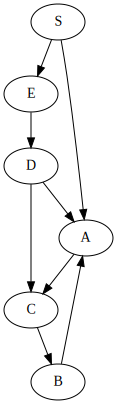

In [8]:
dot = Digraph()

dot.edge('S', 'E')
dot.edge('S', 'A')
dot.edge('E', 'D')
dot.edge('D', 'A')
dot.edge('A', 'C')
dot.edge('B', 'A')
dot.edge('D', 'C')
dot.edge('C', 'B')

#dot.view()
dot

In [9]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'E', 'A', 'D', 'B', 'C']:
    G.addVertex( Node(i) )

In [10]:
V = G.vertices

#dot.edge('S', 'E')
G.addDiEdge( V[0], V[1], 8)

#dot.edge('S', 'A')
G.addDiEdge( V[0], V[2] , 10)

#dot.edge('E', 'D')
G.addDiEdge( V[1], V[3], 1)

#dot.edge('D', 'A')
G.addDiEdge( V[3], V[2], -4)

#dot.edge('A', 'C')
G.addDiEdge( V[2], V[5], 2)

#dot.edge('B', 'A')
G.addDiEdge( V[4], V[2], 1 )

#dot.edge('D', 'C')
G.addDiEdge( V[3], V[5], -1)

#dot.edge('C', 'B')
G.addDiEdge( V[5], V[4], -2 )

Second Example

In [11]:
G = Graph()
#for i in ['0', '1', '2', '3', '4', '5']:
for i in ['S', 'A', 'B']:
    G.addVertex( Node(i) )
    
V = G.vertices

G.addDiEdge( V[0], V[1], 3)

G.addDiEdge( V[0], V[2] , 5)
# G.addDiEdge( V[1], V[2], 1)
G.addDiEdge( V[1], V[2], -1)

In [12]:
print(G)

Graph with:
	 Vertices:
	S,A,B,
	 Edges:
	(S,(<__main__.Node object at 0x00000133B0B599A0>, 3)) (S,(<__main__.Node object at 0x00000133B0B59160>, 5)) (A,(<__main__.Node object at 0x00000133B0B59160>, -1)) 



***

### Section 2: Dijkstra Algorithm

In [13]:
len(G.vertices)

3

In [14]:
def dijkstra(w, G):
    
    for v in G.vertices:
        v.estD = math.inf
        
    w.estD = 0
    unsureVertices = G.vertices[:]
    
    sureVertices = []
    
    while len(unsureVertices) > 0:
    
        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x
        
        if u == None:
            # then there is nothing more that I can reach
            return
        
        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():
            
            if v in sureVertices:
                continue
            
            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
        
        unsureVertices.remove(u)
        sureVertices.append(u)
    
    # that's it!  Now each vertex holds estD which is its distance from w

In [15]:
w = G.vertices[0]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)

S 0
A 3
B 2


***

### <font color='red'> Activity 1: Code Reflections. </font>

In [16]:
### TODO ###
### Good Luck ###
def dijkstra(w, G):
    for v in G.vertices:
        v.estD = math.inf

    w.estD = 0
    unsureVertices = G.vertices[:]

    paths = []
    for i in G.vertices:
        if i.value != w.value:
            paths.append([w.value])

    sureVertices = []

    while len(unsureVertices) > 0:

        # find the u with the minimum estD in the dumbest way possible
        u = None
        minD = math.inf
        for x in unsureVertices:
            if x.estD < minD:
                minD = x.estD
                u = x

        if u == None:
            # then there is nothing more that I can reach
            return

        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():

            if v in sureVertices:
                continue

            if u.estD + wt < v.estD:
                v.estD = u.estD + wt
                for p in paths:
                    if p[-1] == u.value:
                        p.append(v.value)
                        break

        unsureVertices.remove(u)
        sureVertices.append(u)
    print(paths)

w = G.vertices[0]
dijkstra(w, G)

for v in G.vertices:
    print(v.value, v.estD)



[['S', 'A', 'B'], ['S', 'B']]
S 0
A 3
B 2


### <font color='red'> Activity 2: Modify above code to do Bellman-Ford. Make sure you test for negative cycles and compare its performance with Dijkstra. </font>

In [17]:
#### TODO ####
### Good Luck ###
G = Graph()
for i in ['S', 'A', 'B']:
    G.addVertex( Node(i) )
V = G.vertices
G.addDiEdge( V[0], V[1], -3)
G.addDiEdge( V[0], V[2] , 5)
G.addDiEdge(V[2], V[0], 1)
G.addDiEdge( V[1], V[2], -4)

def Bellman_Ford(w, G):
    v_ls = G.vertices
    n = len(G.vertices)
    d = [[np.inf for _ in range(n)] for _ in range(n+1)]
    for sd in d:
        sd[v_ls.index(w)] = 0

    for i in range(1, n+1):
        for u in G.vertices:
            for v, wt in u.getOutNeighborsWithWeights():
                d[i][v_ls.index(v)] = min(d[i-1][v_ls.index(v)], d[i-1][v_ls.index(u)] + wt)

    if d[-1] == d[-2]:
        return d
    else:
        return False


print(Bellman_Ford(G.vertices[0], G))


False


### <font color='red'> Activity 3: Have a look at the following Python's implementation of heap (priority Queues): HeapDict, and try to convert our Dijkstra's implementation to use this heap data structure instead. </font>

In [23]:
### TODO ###
### Good Luck ###
# del G
G = Graph()
for i in ['S', 'A', 'B']:
    G.addVertex(Node(i))

V = G.vertices

G.addDiEdge(V[0], V[1], 3)
G.addDiEdge(V[0], V[2], 5)
G.addDiEdge(V[1], V[2], -1)
from queue import PriorityQueue


def dijkstra(w, G):
    for v in G.vertices:
        v.estD = math.inf

    w.estD = 0
    unsureVertices = G.vertices[:]

    sureVertices = []

    while len(unsureVertices) > 0:

        # find the u with the minimum estD in the dumbest way possible
        u = None
        # minD = math.inf
        q = PriorityQueue()
        for i, x in enumerate(unsureVertices):
            q.put((x.estD, i))

        u = unsureVertices[q.get()[1]]

        if u == None:
            # then there is nothing more that I can reach
            return

        # update u's neighbors
        for v, wt in u.getOutNeighborsWithWeights():

            if v in sureVertices:
                continue

            if u.estD + wt < v.estD:
                v.estD = u.estD + wt

        unsureVertices.remove(u)
        sureVertices.append(u)


w = G.vertices[0]
dijkstra(w, G)
for v in G.vertices:
    print(v.value, v.estD)



S 0
A 3
B 2


***

### Section 4: Dynammc Programming

We discussed Fibonacci numbers sequence as a good example of Dynamic Programming. Let us have a look at its computation.

In [24]:
def Fibonacci(n):
    if n == 0 or n == 1:
        return 1
    return Fibonacci(n-1) + Fibonacci(n-2)
                

In [25]:
def fasterFibonacci(n):
    
    F = [1 for i in range(n+1)]

    for i in range(2,n+1):
        F[i] = F[i-1] + F[i-2]
        
    return F[n]

In [26]:
def Fibonacci_topdown(n,F):
    
    if F[n] != None:
        return F[n]
    
    F[n] = Fibonacci_topdown(n-1, F) + Fibonacci_topdown(n-2, F)
    return F[n]

Have a look at above different ways to compute Fibonacci numbers. Report on their running time. Make sure you know the difference between them.

***

### <font color='red'> Activity 4: Write a brief report comparing 'Dynamic Programming' with 'Divide-and-Conquer' strategy? (If you are not familiar with Divide-and-Conquer strategy - revisit Quick Sort or Binary Search algorithms. You should address why we can not use DP for Quick Sort or Binary Sort). </font>

In [27]:
### TODO ###
### Good Luck ###
def partition(arr,low,high):
    i = ( low-1 )         # 最小元素索引
    pivot = arr[high]

    for j in range(low , high):

        # 当前元素小于或等于 pivot
        if   arr[j] <= pivot:

            i = i+1
            arr[i],arr[j] = arr[j],arr[i]

    arr[i+1],arr[high] = arr[high],arr[i+1]
    return ( i+1 )


# arr[] --> 排序数组
# low  --> 起始索引
# high  --> 结束索引

# 快速排序函数
def quickSort(arr,low,high):
    if low < high:

        pi = partition(arr,low,high)

        quickSort(arr, low, pi-1)
        quickSort(arr, pi+1, high)

arr = [10, 7, 8, 9, 1, 5]
n = len(arr)
quickSort(arr,0,n-1)
print ("排序后的数组:")
for i in range(n):
    print("%d" %arr[i])



排序后的数组:
1
5
7
8
9
10


### <font color='red'> Activity 5: You are running up a staircase with a total of n steps. You can hop either 1 step, 2 steps or 3 steps at at time. Write a DP program to determine how many possible ways you can run up the stairs? (Hint: Start with a recursive solution, and then later move to top-down approach of DP). </font>

In [28]:
### TODO ###
### Good Luck ###
def cul_staircase(n):
    if n <= 3:
        return n

    else:
        return cul_staircase(n-1) + cul_staircase(n-2) + cul_staircase(n-3)

print(cul_staircase(10))









230


### <font color='red'> Activity 6: Implement Floyd-Warshal algorithm using above data structure (that is Node and Graph). Make sure to test all the use-cases. </font>

In [41]:
#### TODO ####
### Good Luck ###
del G
G = Graph()
for i in ['S', 'U', 'V', 'T']:
    G.addVertex(Node(i))

V = G.vertices

G.addDiEdge(V[0], V[1], 2)
G.addDiEdge(V[1], V[0], 1)
G.addDiEdge(V[0], V[2], 5)
G.addDiEdge(V[1], V[2], 2)
G.addDiEdge(V[2], V[3], -2)
# print(G.vertices.index(V[1]))


def Floyd_warshall(G):
    n = len(G.vertices)
    D = [[np.inf for _ in range(n)] for _ in range(n)]
    for i in range(n):
        D[i][i] = 0

    for u in G.vertices:
        for v, wt in u.getOutNeighborsWithWeights():
            D[G.vertices.index(u)][G.vertices.index(v)] = wt
    # print(D)

    for k in range(n):
        for row in range(n):
            for col in range(n):
                D[row][col] = min(D[row][col], D[row][k]+D[k][col])

    print(D)

Floyd_warshall(G)






[[0, 2, 4, 2], [1, 0, 2, 0], [inf, inf, 0, -2], [inf, inf, inf, 0]]


***

***